In [179]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib
from sklearn import neighbors
from sklearn import metrics
import seaborn as sns

In [115]:
inputdf=pd.read_csv("iris.data",sep=",", header=None,names=['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class'])
inputdf.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [116]:
inputdf["class"].unique()
inputdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepalLength    150 non-null float64
sepalWidth     150 non-null float64
petalLength    150 non-null float64
petalWidth     150 non-null float64
class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [117]:
inputdf["class"]=pd.Categorical(inputdf["class"]) ### changing to class to catergorical data type
inputdf["class"]=inputdf["class"].cat.codes ## changing it to cat to code eg (1,2,3)
inputdf.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [118]:
## spliting the model into five
KF=model_selection.KFold(n_splits=5)
KF


KFold(n_splits=5, random_state=None, shuffle=False)

In [119]:
X=inputdf[inputdf.columns[:-1]].values
y=inputdf["class"].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [120]:
### shuffuling the dataset

SX,sy=shuffle(X,y,random_state=999)

sy

array([1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1,
       2, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2,
       2, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2,
       0, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 1], dtype=int8)

In [121]:
### spliting the data set

for i,j in KF.split(inputdf):
    train_x,test_x=SX[i],SX[j]
    train_y,test_y=sy[i],sy[j]

test_y    


array([2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 0,
       1, 1, 2, 0, 2, 0, 2, 1], dtype=int8)

##### Running kNN and Decision Tree with 5-folder cross validation

In [122]:


neighboursMax=25
knnAccuracy=[[] for i in range(neighboursMax)]
dtAccuracy=[]

for i,j in KF.split(inputdf):
    
    
    
    train_x,test_x=SX[i],SX[j]
    train_y,test_y=sy[i],sy[j]
    
    
    ## decision tree classifier
    
    clfTree=DecisionTreeClassifier()
    clfTree.fit(train_x,train_y)
    predcit_y=clfTree.predict(test_x)
    dtAccuracy.append(metrics.accuracy_score(predcit_y,test_y))
    

    
    ### Knn Classifier
    for k in range(0,neighboursMax):
       
        clfknn=neighbors.KNeighborsClassifier(n_neighbors=k+1)
        clfknn.fit(train_x,train_y)
        predcit_y=clfknn.predict(test_x)
        knnAccuracy[k].append(metrics.accuracy_score(predcit_y,test_y))

    


joblib.dump(clfTree,"Decision_Tree.joblib")
joblib.dump(clfknn,"KNN.joblib")    




['KNN.joblib']

In [123]:
dtAccuracy
#np.mean(dtAccuracy)

[0.9333333333333333, 0.9666666666666667, 1.0, 0.9, 0.9666666666666667]

In [136]:
mean_kNNaccuracy = []
for i in range(0,25):
    mean_kNNaccuracy.append(np.mean(knnAccuracy[i]))
 

#### Evaluate how K impacts the overall accuracyof kNN on the dataset. Use histogram plots to visualize the results and identify the best K.

(0.9, 1)

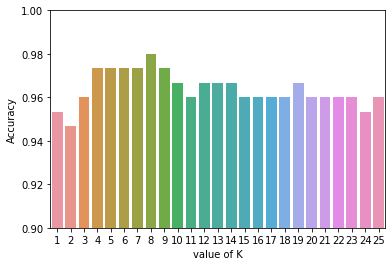

In [193]:

results = {
    'value of K': [y+1 for y in range(neighboursMax)], 
    'Accuracy': mean_kNNaccuracy
}

r=pd.DataFrame(data=results)

x = sns.barplot(x="value of K",y="Accuracy",data=r )
x.set_ylim([.9,1])


In [138]:
# Best K 

print("The Best K value is :",mean_kNNaccuracy.index(max(mean_kNN_accuracies)))


The Best K value is : 7


#### Compare the overall accuraciesof kNN with the best K and decision trees using histogram plots. Which classifier is better and why?

(0.9, 1)

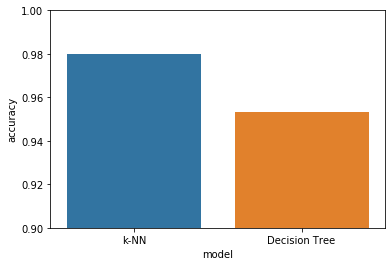

In [182]:
# Histogram to compare the average accuracy of k-NN and Decision tree
obj = ('k-NN', 'Decision Tree')

results = {
    'model': obj, 
    'accuracy': [mean_kNN_accuracies[7], np.mean(dtAccuracy)]
}

dtvsknn = pd.DataFrame(data=results)


x = sns.barplot(x="model",y="accuracy",data=dtvsknn)
x.set_ylim([.9,1])





In [128]:
## Load the save model and predict the values
##
dtree=joblib.load("Decision_Tree.joblib")
print(dtree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [129]:
print(dtree.predict(train_x))

[1 1 1 0 0 0 0 1 2 0 0 2 0 2 1 2 2 2 2 0 0 0 0 2 1 0 2 2 2 2 2 2 1 0 2 0 1
 2 1 1 1 2 0 1 2 1 0 1 0 0 2 1 0 2 0 0 0 1 2 2 1 0 0 1 1 2 2 0 1 1 0 1 2 1
 1 1 1 1 0 0 2 0 2 2 0 1 1 1 1 0 0 0 0 1 2 0 0 1 2 1 2 2 0 2 0 1 1 2 0 2 0
 1 1 2 0 1 1 1 2 0]


In [133]:
knn=joblib.load("KNN.joblib")
knn


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [134]:
print(knn.predict(train_x))

[1 1 1 0 0 0 0 1 1 0 0 2 0 2 1 2 2 2 2 0 0 0 0 2 2 0 2 2 2 1 2 2 1 0 2 0 1
 2 1 1 1 2 0 1 2 1 0 1 0 0 1 1 0 1 0 0 0 1 2 2 1 0 0 1 1 2 2 0 1 1 0 1 2 1
 1 1 1 1 0 0 2 0 2 2 0 1 1 1 1 0 0 0 0 1 2 0 0 1 2 1 2 2 0 2 0 1 1 2 0 2 0
 1 1 1 0 1 1 1 2 0]


KNN works well with data with rare occurances, KNN is does'nt require additional training on data as it calculate some distance metrics, then it looks at the target label for each neighbour and places the new found data into the majority category. KNN is kind of iterative and disregards few features while training.On the other hand decision tree data hungry and it has the problem of overfitting in training.

As we can see above bar chart that accuracy of of KNN is 0.98 while decision tree has 0.95. 

https://github.com/rpm360/MLassignment/blob/master/HW5/HW5code.ipynb